**1. Setup and Imports**

In [17]:
# Install if needed: !pip install -q seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

**2. Load the Dataset**

In [18]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('3.ecommerce_furniture_dataset_2024.csv')
print("Shape of data:", df.shape)
df.head()

Saving 3.ecommerce_furniture_dataset_2024.csv to 3.ecommerce_furniture_dataset_2024 (1).csv
Shape of data: (2000, 5)


,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


**3. Data Cleaning**

In [19]:
# Drop columns with too many missing values
df.drop(columns=['originalPrice'], inplace=True)

# Clean price column
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Clean 'sold' column (if not numeric already)
df['sold'] = pd.to_numeric(df['sold'], errors='coerce')

# Drop missing values
df.dropna(inplace=True)

# Normalize unusual shipping tags
df['tagText'] = df['tagText'].apply(lambda x: x if x in ['Free shipping', '+Shipping: $5.09'] else 'Other')

# Label encode categorical feature
encoder = LabelEncoder()
df['tagText'] = encoder.fit_transform(df['tagText'])

df.head()

,productTitle,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,46.79,600,1
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,169.72,0,1
2,Desser For Bedroom With 7 Fabric Drawers Organ...,39.46,7,1
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",111.99,0,1
4,Small Unit Simple Computer Desk Household Wood...,21.37,1,1


**4. Exploratory Data Analysis (EDA)**

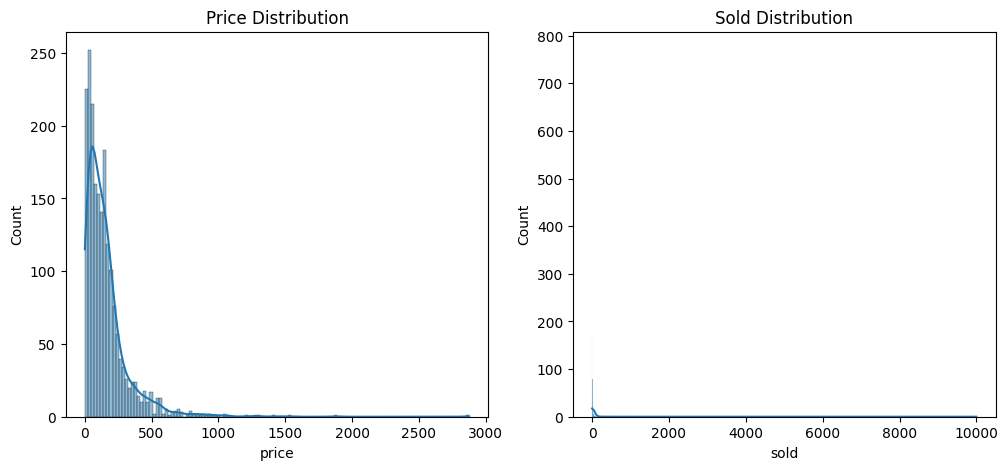

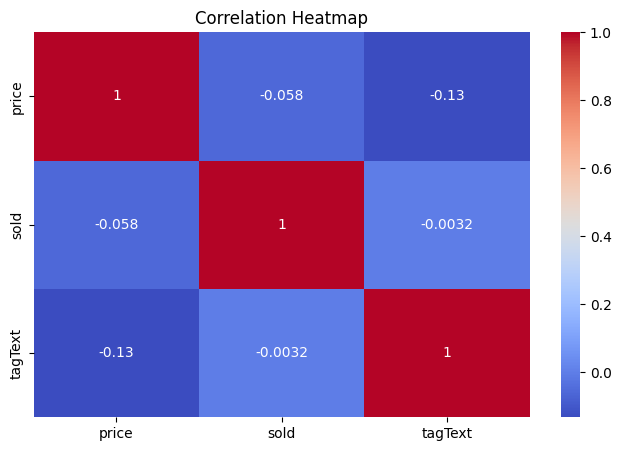

In [20]:
# Distribution plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['price'], ax=axes[0], kde=True)
axes[0].set_title('Price Distribution')

sns.histplot(df['sold'], ax=axes[1], kde=True)
axes[1].set_title('Sold Distribution')
plt.show()

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Now plot the correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**5. Feature Engineering**

In [21]:
# Add feature: price range bucket
df['price_range'] = pd.cut(df['price'],
                           bins=[0, 50, 100, 200, np.inf],
                           labels=['Low', 'Medium', 'High', 'Very High'])

# Encode it
df['price_range'] = LabelEncoder().fit_transform(df['price_range'])

# Drop text column
df.drop(columns=['productTitle'], inplace=True)

**6. Model Training**

In [22]:
# Feature-target split
X = df.drop(columns=['sold'])
y = df['sold']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1)

# Models
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=1)

# Train
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

**7. Model Evaluation**

In [23]:
# Linear Regression
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Random Forest
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Linear Regression")
print(f"  - MSE: {mse_lr:.2f}")
print(f"  - R² Score: {r2_lr:.2f}\n")

print("Random Forest")
print(f"  - MSE: {mse_rf:.2f}")
print(f"  - R² Score: {r2_rf:.2f}")

Linear Regression
  - MSE: 3554.56
  - R² Score: -0.13

Random Forest
  - MSE: 8701.63
  - R² Score: -1.77


**8. Display Clean Table View**

In [24]:
from IPython.display import display, HTML
display(HTML(df.head(100).to_html()))


,price,sold,tagText,price_range
0,46.79,600,1,1
1,169.72,0,1,0
2,39.46,7,1,1
3,111.99,0,1,0
4,21.37,1,1,1
5,123.40,53,1,0
6,198.31,1,1,0
7,734.58,5,1,3
9,233.30,0,1,3
10,244.17,1,1,3


**Feature Importance (Random Forest)**

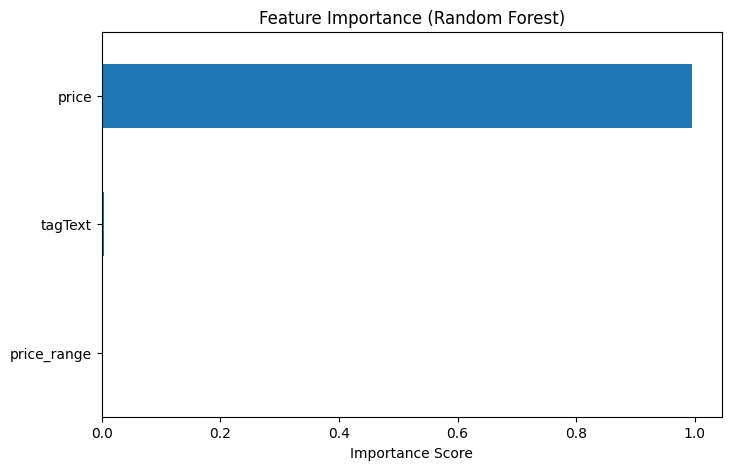

In [25]:
# Feature importance visualization
feat_import = pd.Series(rf.feature_importances_, index=X.columns)
feat_import.sort_values().plot(kind='barh', figsize=(8, 5), title='Feature Importance (Random Forest)')
plt.xlabel("Importance Score")
plt.show()

**Save Results to Excel/CSV**

In [27]:
results = pd.DataFrame({
    'Actual': y_test,
    'LR_Predicted': y_pred_lr,
    'RF_Predicted': y_pred_rf
})

# Save results
results.to_csv("prediction_results.csv", index=False)

# Download file to your computer
from google.colab import files
files.download("prediction_results.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>